In [2]:
import climada.entity as ce
import climada.util.coordinates as coord
import climada.hazard as hz
import climada.damage as dmg

# Define the hazard and location
hazard = hz.Flood()
latitude = 52.3702
longitude = 4.8952
location = coord.Coord(latitude, longitude)

# Define the building parameters
building = ce.Building()
building.country_id = "NLD"
building.building_type = "W1S" # a wooden single-family house
building.height_ag = 2.5
building.floor_area = 100
building.year_built = 1980 # year of construction of the building

# Estimate the SDR for the building given the hazard intensity at the location
hazard_intensities = hazard.get_intensity(location)
sdr = dmg.structural_dmg_ratio(building, hazard_intensities)

# Print the estimated SDR
print("The estimated SDR for the wooden house is:", sdr)

# https://stackoverflow.com/questions/64261546/how-to-solve-error-microsoft-visual-c-14-0-or-greater-is-required-when-inst


c:\Users\Eda\.conda\envs\ProjectT\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Eda\.conda\envs\ProjectT\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Eda\.conda\envs\ProjectT\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


ModuleNotFoundError: No module named 'osgeo'

In [ ]:
# Steel: S1S
# Wood: W1S
# Concrete: C1S

# S: Standard system (i.e., no specific seismic-resistant design features).
# R: Reinforced concrete (RC) moment-resisting frames or shear walls.
# C: Confined masonry.
# W: Wood frame with seismic-resistant details.
# U: Unreinforced masonry.
# M: Steel moment-resisting frames or shear walls.
# F: Steel braced frames.

# 1: Single-family house
# 2: Multi-family house
# 3: Commercial building
# 4: Industrial building
# 5: Public building
# 6: Infrastructure

In [ ]:
import climada.entity as ce
import climada.util.coordinates as coord
import climada.hazard as hz
import climada.damage as dmg
import climada.entity.exposures as ce_exp
import climada.entity.impact_funcs as ce_imp
import climada.engine as cleng

# Define the location of the house
latitude = 52.3702
longitude = 4.8952
location = coord.Coord(latitude, longitude)

# Define the building parameters
building = ce.Building()
building.country_id = "NLD"
building.building_type = "W1S" # a wooden single-family house
building.height_ag = 2.5
building.floor_area = 100
building.year_built = 1980 # year of construction of the building

# Define the exposure data for the house
exp_house = ce_exp.Exposures()
exp_house.set_lat_lon([latitude], [longitude])
exp_house['building'] = [building]
exp_house.id = ['House']

# Load the flood hazard data for the Netherlands
flood_file = 'path/to/flood/hazard/file.tif'
flood_hazard = hz.Flood().from_file(flood_file)

# Estimate the SDR for the building given the hazard intensity at the location
hazard_intensities = flood_hazard.get_intensity(location)
sdr = dmg.structural_dmg_ratio(building, hazard_intensities)

# Print the estimated SDR
print("The estimated SDR for the wooden house is:", sdr)

# Define the damage function for a wooden single-family house
wooden_sf_df = ce_imp.read_damage_functions('wooden_sf')

# Apply the damage function to the exposure data
house_impact = wooden_sf_df.calc_impact(exp_house, flood_hazard)

# Compute the total damage
total_damage = house_impact.sum()

# Print the total damage
print('The estimated total damage to the house is {:.2f} EUR.'.format(total_damage))

# Estimate the recovery time
recovery_rates = ce_imp.get_rec_time_series('wooden_sf', 'NLD', 'EUR')
recovery_time = cleng.calc_recovery_time(house_impact, recovery_rates)

# Print the estimated recovery time
print('The estimated recovery time for the house is {:.2f} months.'.format(recovery_time))


In [1]:
import climada

# Check if the package is installed and print the version number
print("Climada version:", climada.__version__)

# Create a simple hazard object and print the basic properties
hazard = climada.hazard.Hazard()
print("Hazard object type:", type(hazard))
print("Hazard object properties:", hazard.__dict__)


c:\Users\Eda\.conda\envs\ProjectT\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Eda\.conda\envs\ProjectT\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Eda\.conda\envs\ProjectT\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


AttributeError: module 'climada' has no attribute '__version__'

In [2]:
import climada.entity as ce
import climada.util as cu

# Create a list of assets
assets = [ce.Asset(lon=-118.2437, lat=34.0522, name='Los Angeles'),
          ce.Asset(lon=-74.0059, lat=40.7128, name='New York'),
          ce.Asset(lon=8.5417, lat=47.3769, name='Zurich')]

# Create a simple exposure object from the list of assets
exposure = ce.Exposure()
for asset in assets:
    exposure.append(asset)

# Set the exposure to a uniform value of 100
exposure.set_mdd(100)

# Create a simple hazard object for wind
hazard = ce.Hazard('wind', 'dummy_event', 'MW', 1, 1, 1, cu.date_shift())

# Run the impact calculation
impact = hazard.impact(exposure)

# Print the total affected value
print("Total affected value:", impact.get_summary())


ModuleNotFoundError: No module named 'osgeo'

In [3]:
import climada



event_id:  [1]
event_name:  ['1']
date:  [1.]
frequency:  [0.5]
orig:  [ True]
min, max fraction:  0.0 1.0


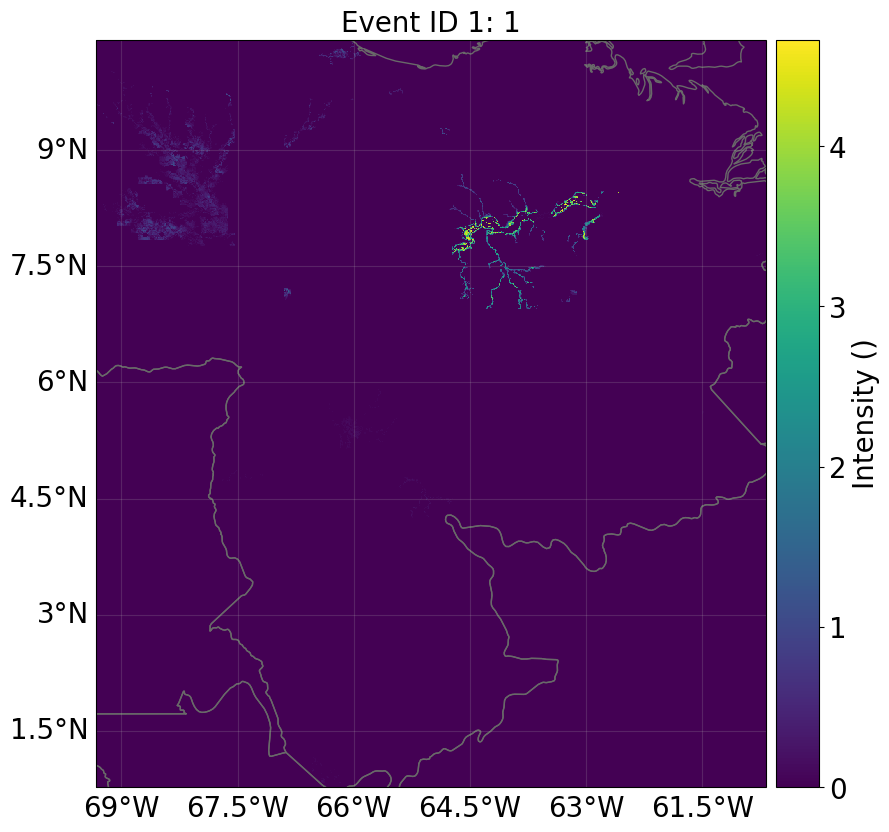

In [4]:
%matplotlib inline
import numpy as np
from climada.hazard import Hazard
from climada.util.constants import HAZ_DEMO_FL
# to hide the warnings
import warnings
warnings.filterwarnings('ignore')

# read intensity from raster file HAZ_DEMO_FL and set frequency for the contained event
haz_ven = Hazard.from_raster([HAZ_DEMO_FL], attrs={'frequency':np.ones(1)/2}, haz_type='FL')
haz_ven.check()

# The masked values of the raster are set to 0
# Sometimes the raster file does not contain all the information, as in this case the mask value -9999
# We mask it manuall and plot it using plot_intensity()
haz_ven.intensity[haz_ven.intensity==-9999] = 0
haz_ven.plot_intensity(1, smooth=False) # if smooth=True (default value) is used, the computation time might increase

# per default the following attributes have been set
print('event_id: ', haz_ven.event_id)
print('event_name: ', haz_ven.event_name)
print('date: ', haz_ven.date)
print('frequency: ', haz_ven.frequency)
print('orig: ', haz_ven.orig)
print('min, max fraction: ', haz_ven.fraction.min(), haz_ven.fraction.max())

In [1]:
import climada.engine as ce
import climada.util.constants as constants
import climada.entity.exposures as exp

# Define exposure
lat, lon = 52.379189, 4.899431 # Coordinates for Amsterdam, Netherlands
exposure = exp.Exposures()
exposure.loc = exp.Location()
exposure.loc.lat = [lat]
exposure.loc.lon = [lon]
exposure.loc.weight = [1]
exposure.set_country_iso('NLD')
exposure.set_geometry()

# Define hazard
hazard = ce.Hazard()
hazard.set_country_iso('NLD')
hazard.set_event_time('2013-10-28 12:00:00')
hazard.read_hazard_data(constants.get_default_folder('hazard_data'), 'fluvial_flood_river2500y.csv', 'GLOFRIS')

# Define impact function
impact_func = ce.ImpactFunc()
impact_func.read_file(constants.get_default_folder('impact_data'), 'if_wood.csv')

# Define impact
impact = ce.Impact()
impact.set_model('dfr')
impact.set_affected_area_type('buildings')
impact.set_impact_function(impact_func)
impact.set_exposures(exposure)
impact.set_hazard(hazard)

# Calculate building damage
impact.calc_summaries()
damage = impact.get_summary()
print(damage)


c:\Users\Eda\.conda\envs\ProjectT\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Eda\.conda\envs\ProjectT\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Eda\.conda\envs\ProjectT\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


ModuleNotFoundError: No module named 'osgeo'

In [1]:
import numpy as np
from climada.entity import ImpactFunc

# We initialise a dummy ImpactFunc for tropical cyclone wind damage to building.
# Giving the ImpactFunc an arbitrary id 3.
haz_type = "TC"
id = 3
name = "TC building damage"
# provide unit of the hazard intensity
intensity_unit = "m/s"
# provide values for the hazard intensity, mdd, and paa
intensity = np.linspace(0, 100, num=15)
mdd = np.concatenate((np.array([0]), np.sort(np.random.rand(14))), axis=0)
paa = np.concatenate((np.array([0]), np.sort(np.random.rand(14))), axis=0)
imp_fun = ImpactFunc(
    id=id,
    name=name,
    intensity_unit=intensity_unit,
    haz_type=haz_type,
    intensity=intensity,
    mdd=mdd,
    paa=paa,
)

# check if the all the attributes are set correctly
imp_fun.check()


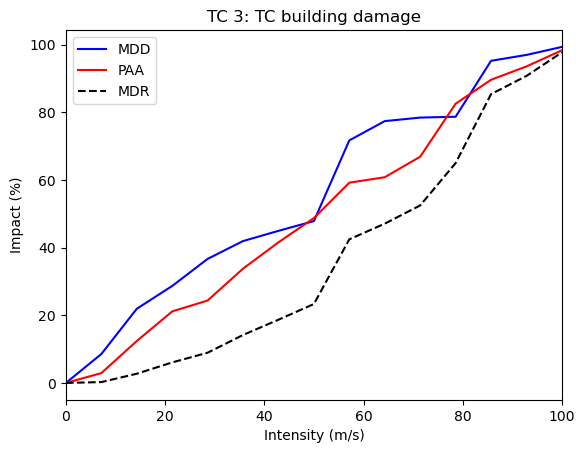

In [2]:
# plot impact function
imp_fun.plot();

TypeError: ImpactFunc.__init__() got an unexpected keyword argument 'material'

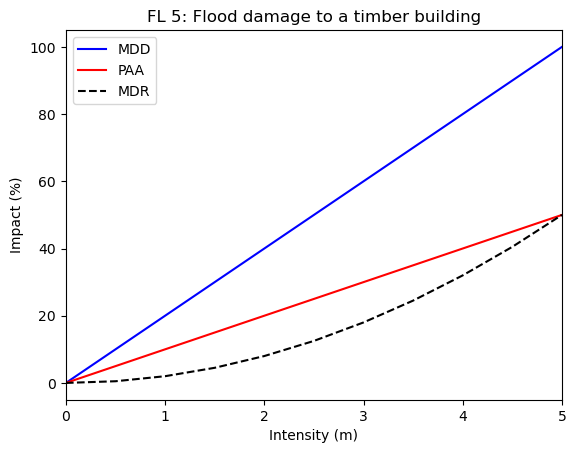

In [6]:
import numpy as np
from climada.entity import ImpactFunc

# We initialise a dummy ImpactFunc for flood damage to a timber building.
# Giving the ImpactFunc an arbitrary id 4.
haz_type = "FL"
name = "Flood damage to a timber building"
# provide unit of the hazard intensity
intensity_unit = "m"
# provide values for the hazard intensity, mdd, and paa
intensity = np.linspace(0, 5, num=11)
mdd = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
paa = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
imp_fun = ImpactFunc(
    id=id,
    name=name,
    intensity_unit=intensity_unit,
    haz_type=haz_type,
    intensity=intensity,
    mdd=mdd,
    paa=paa,
)

# check if the all the attributes are set correctly
imp_fun.check()

# plot impact function
imp_fun.plot();



In [8]:
import numpy as np
from climada.entity import ImpactFunc

haz_type = "FL"
id = 5
name = "Flood damage to a steel building"
intensity_unit = "m"
intensity = np.linspace(0, 5, num=11)
mdd = np.array([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
paa = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
material = "steel"
imp_fun = ImpactFunc(
    id=id,
    name=name,
    intensity_unit=intensity_unit,
    haz_type=haz_type,
    intensity=intensity,
    mdd=mdd,
    paa=paa,
    material=material
)

# check if the all the attributes are set correctly
imp_fun.check()

# plot impact function
imp_fun.plot();


TypeError: ImpactFunc.__init__() got an unexpected keyword argument 'material'

In [ ]:
######################################### NEW ATTEMPT ########################################################

In [16]:
import numpy as np
from climada.entity import ImpactFunc

# We initialise a dummy ImpactFunc for tropical cyclone wind damage to building.
# Giving the ImpactFunc an arbitrary id 3.
haz_type = "TC"
id = 3
name = "TC building damage"
# provide unit of the hazard intensity
intensity_unit = "m/s"
# provide values for the hazard intensity, mdd, and paa
intensity = np.linspace(0, 100, num=15)
mdd = np.concatenate((np.array([0]), np.sort(np.random.rand(14))), axis=0)
paa = np.concatenate((np.array([0]), np.sort(np.random.rand(14))), axis=0)
imp_fun = ImpactFunc(
    id=id,
    name=name,
    intensity_unit=intensity_unit,
    haz_type=haz_type,
    intensity=intensity,
    mdd=mdd,
    paa=paa,
)

# check if the all the attributes are set correctly
imp_fun.check()

# Calculate the mdr at hazard intensity 18.7 m/s
print('Mean damage ratio at intensity 18.7 m/s: ', imp_fun.calc_mdr(18.7))

# plot impact function
imp_fun.plot();

Read file: C:\Users\Eda\climada\data\entity_template.xlsx


AttributeError: 'ImpactFunc' object has no attribute 'get_xdata'

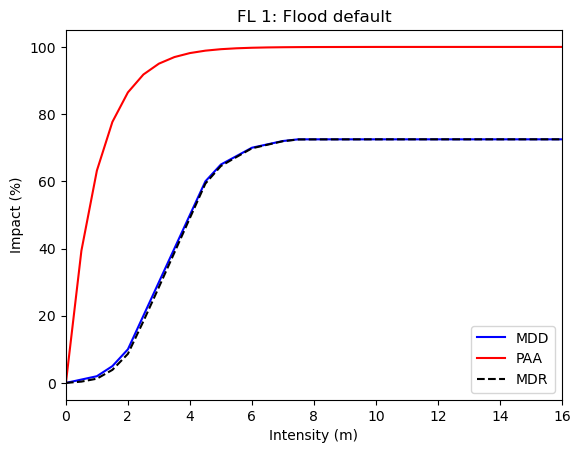

In [33]:
from climada.entity import ImpactFunc, ImpactFuncSet
from climada.util import ENT_TEMPLATE_XLS
import matplotlib.pyplot as plt

# provide absolute path of the input excel file
file_name = ENT_TEMPLATE_XLS
# fill ImpactFuncSet from Excel file
imp_set_xlsx = ImpactFuncSet.from_excel(file_name)

# plot all the impact functions from the ImpactFuncSet
print('Read file:', imp_set_xlsx.tag.file_name)
# imp_set_xlsx.plot()
# # adjust the plots
# plt.subplots_adjust(right=1., top=4., hspace=0.4, wspace=0.4)

# extract the TC impact function with id 1
impf_tc_1 = imp_set_xlsx.get_func('FL', 1)
# plot the impact function
impf_tc_1.plot();

# get values
curve = impf_tc_1 = imp_set_xlsx.get_func('FL', 1)
xdata = curve.get_xdata()
ydata = curve.get_ydata()
print("X data points for the plot is: ", xdata)
print("Y data points for the plot is: ", ydata)